In [1]:
from example import spark

:: loading settings :: url = jar:file:/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/da/.ivy2/cache
The jars for the packages stored in: /Users/da/.ivy2/jars
ai.eto#rikai_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-e8f4c7f9-a353-41ca-b98c-05c0f2ec80bf;1.0
	confs: [default]
	found ai.eto#rikai_2.12;0.0.12 in central
	found org.antlr#antlr4-runtime;4.8-1 in local-m2-cache
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found org.apache.logging.log4j#log4j-api-scala_2.12;12.0 in central
	found org.scala-lang#scala-reflect;2.12.10 in spark-list
	found org.apache.logging.log4j#log4j-api;2.13.2 in central
	found io.circe#circe-core_2.12;0.12.3 in central
	found io.circe#circe-numbers_2.12;0.12.3 in central
	found org.typelevel#cats-core_2.12;2.0.0 in central
	found org.typelevel#cats-macros_2.12;2.0.0 in central
	found org.typelevel#cats-kernel_2.12;2.0.0 in central
	found io.circe#circe-generic_2.12;0.12.3 in central
	found com.chuusai#shapeless_2.12;2.3.3 in spark-list
	found org.typ

In [2]:
df = spark.read.format("parquet").load("/tmp/rikai_example/elephants_dream")
df.createOrReplaceTempView("elephants_dream")

In [3]:
mlflow_tracking_uri = "sqlite:///mlruns.db"
registered_model_name = f"yolov5s-model"

spark.conf.set("rikai.sql.ml.registry.mlflow.tracking_uri", mlflow_tracking_uri)

spark.sql(f"""
    CREATE OR REPLACE MODEL mlflow_yolov5_m USING 'mlflow:///{registered_model_name}';
""")

2021-11-16 15:56:46,053 INFO Rikai (mlflow_registry.py:223): Resolving model mlflow_yolov5_m from mlflow:///yolov5s-model
2021-11-16 15:56:46,736 INFO Rikai (base.py:207): Created model inference pandas_udf with name mlflow_yolov5_m_5f3e7ffa


DataFrame[]

In [8]:
rows = spark.sql("""
select frame_id, date_format(ts, 'mm:ss') as progress, image_data
from elephants_dream where frame_id > 1000
order by frame_id asc
limit 10
""").collect()

In [5]:
rows[0].progress

'00:41'

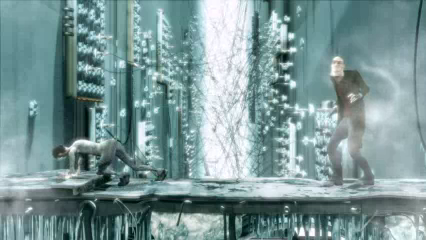

In [12]:
from rikai.types.vision import Image
Image(rows[9].image_data)

In [7]:
result = spark.sql("""
from (
  select 
    frame_id,
    date_format(ts, 'mm:ss') as progress,
    image_data
  from elephants_dream
  where frame_id > 1000 and frame_id < 1500
  order by frame_id asc
  limit 10
)
select
  frame_id,
  progress,
  ML_PREDICT(mlflow_yolov5_m, image_data) as pred
""").collect()

21/11/16 15:57:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/11/16 15:57:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/11/16 15:57:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.set

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 604, in main
    process()
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 596, in process
    serializer.dump_stream(out_iter, outfile)
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 273, in dump_stream
    return ArrowStreamSerializer.dump_stream(self, init_stream_yield_batches(), stream)
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 81, in dump_stream
    for batch in iterator:
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py", line 266, in init_stream_yield_batches
    for series in iterator:
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 356, in func
    for result_batch, result_type in result_iter:
  File "/Users/da/.pyenv/versions/3.8.10/envs/rikai-example/lib/python3.8/site-packages/rikai/spark/sql/codegen/pytorch.py", line 69, in torch_inference_udf
    for batch in DataLoader(
  File "/Users/da/.pyenv/versions/rikai-example/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 517, in __next__
    data = self._next_data()
  File "/Users/da/.pyenv/versions/rikai-example/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1199, in _next_data
    return self._process_data(data)
  File "/Users/da/.pyenv/versions/rikai-example/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1225, in _process_data
    data.reraise()
  File "/Users/da/.pyenv/versions/rikai-example/lib/python3.8/site-packages/torch/_utils.py", line 429, in reraise
    raise self.exc_type(msg)
TypeError: __init__() missing 1 required positional argument: 'java_exception'
